# Self-Driving Car Engineer Nanodegree


## Project: **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images). Check out the video clip "raw-lines-example.mp4" (also contained in this repository) to see what the output should look like after using the helper functions below. 

Once you have a result that looks roughly like "raw-lines-example.mp4", you'll need to get creative and try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines.  You can see an example of the result you're going for in the video "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

In addition to implementing code, there is a brief writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) that can be used to guide the writing process. Completing both the code in the Ipython notebook and the writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/322/view) for this project.

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to display the image.

**Note: If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".**

---

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**

---

<figure>
 <img src="line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above) after detecting line segments using the helper functions below </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your goal is to connect/average/extrapolate line segments to get output like this</p> 
 </figcaption>
</figure>

**Run the cell below to import some packages.  If you get an `import error` for a package you've already installed, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt.  Also, see [this forum post](https://carnd-forums.udacity.com/cq/viewquestion.action?spaceKey=CAR&id=29496372&questionTitle=finding-lanes---import-cv2-fails-even-though-python-in-the-terminal-window-has-no-problem-with-import-cv2) for more troubleshooting tips.**  

## Import Packages

In [1]:
#importing some useful packages
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.

['camera_cal/calibration1.jpg']


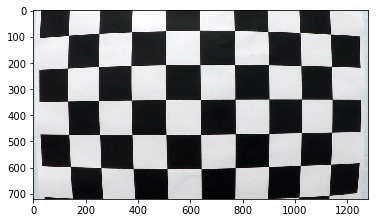

In [2]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((5*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:5].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration1.jpg')
print(images)
image = cv2.imread('camera_cal/calibration1.jpg')
plt.imshow(image)

ret is True


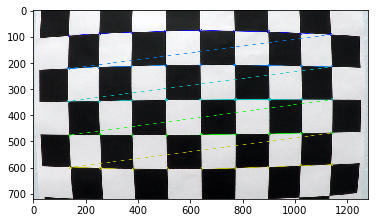

In [3]:
# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,5), None)
    print("ret is",ret)
    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (9,5), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        cv2.imshow('img', img)
        cv2.waitKey(500)
        plt.imshow(img)
cv2.destroyAllWindows()


## Apply a distortion correction to raw images

img_size 1280 720


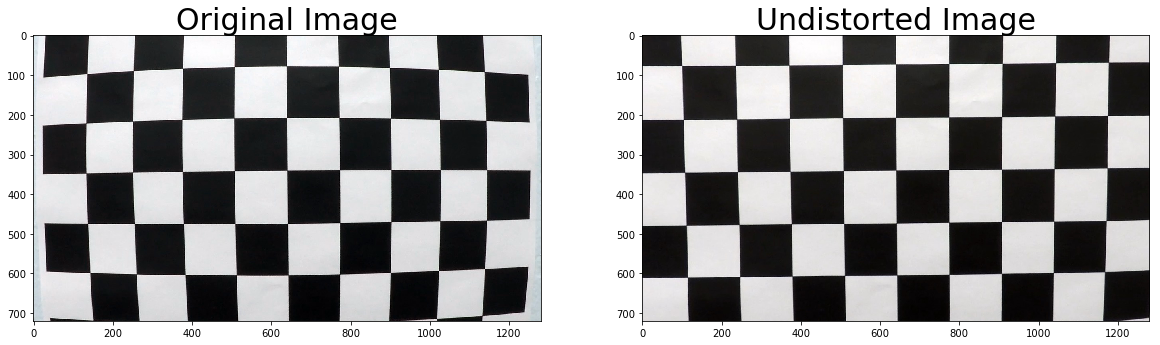

In [4]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = image
img_size = (img.shape[1], img.shape[0])
print("img_size",img.shape[1], img.shape[0])
# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

dst = cv2.undistort(img, mtx, dist, None, mtx)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
'''
cv2.imwrite('camera_cal/calibration1.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "calibration_wide/wide_dist_pickle.p", "wb" ) )
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
'''
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)


### Apply distortion correction to test image

In [5]:
# Make a list of test images
images_straight_lines = glob.glob('test_images/straight_line*.jpg')
print(images_straight_lines)
images_test = glob.glob('test_images/test*.jpg')
print(images_test)

images_straight_lines_undistorion = []
images_test_undistorion = []

images_straight_lines_warped = []
images_test_warped = []

['test_images/straight_lines1.jpg', 'test_images/straight_lines2.jpg']
['test_images/test1.jpg', 'test_images/test2.jpg', 'test_images/test3.jpg', 'test_images/test4.jpg', 'test_images/test5.jpg', 'test_images/test6.jpg']


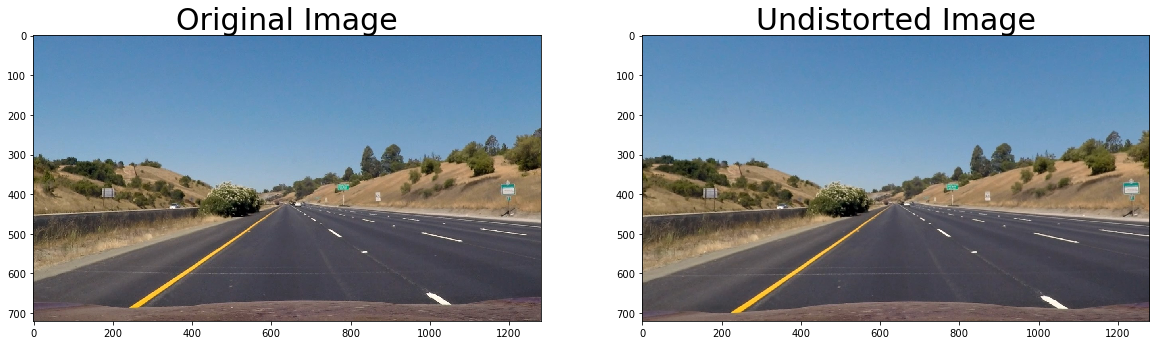

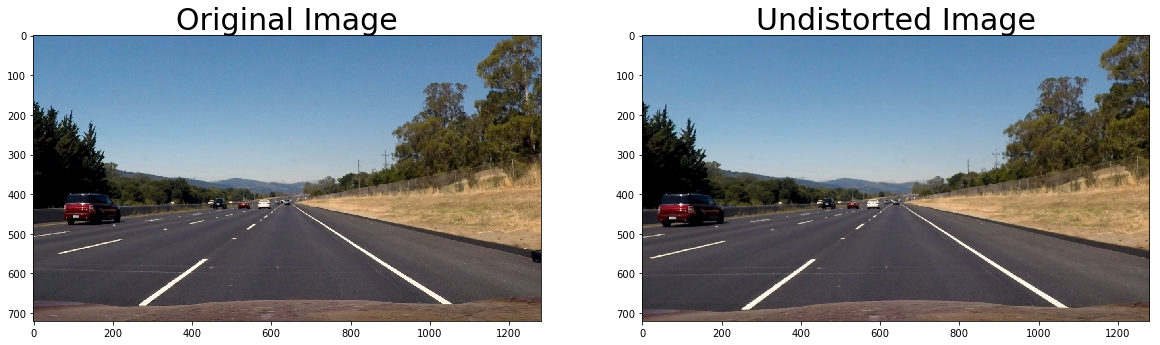

In [6]:
# Step through the list and search for chessboard corners
for idx, fname in enumerate(images_straight_lines):
    
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #img_size = (img.shape[1], img.shape[0])
    #print("img_size",img.shape[1], img.shape[0])
    
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    #dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

    # Visualize undistortion
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=30)
    ax2.imshow(dst)
    ax2.set_title('Undistorted Image', fontsize=30)
    
    images_straight_lines_undistorion.append(dst)

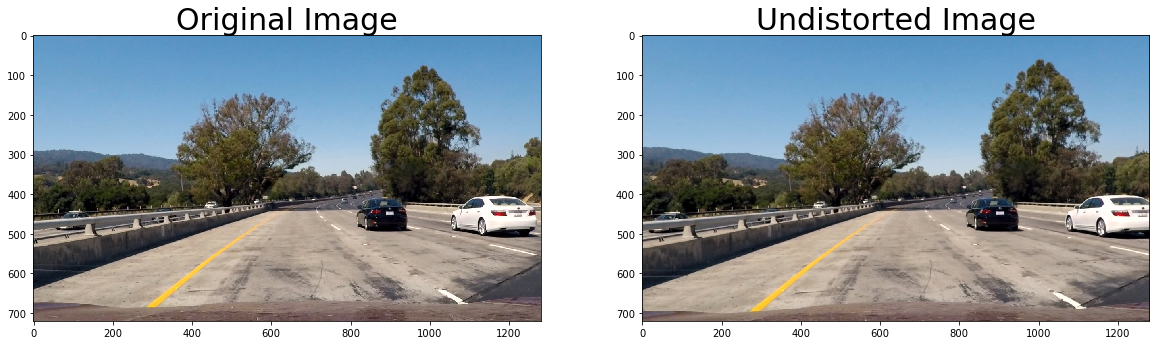

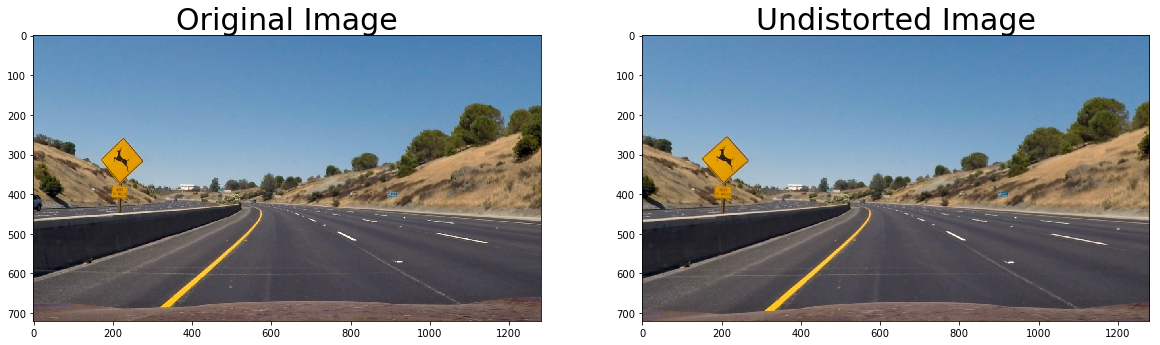

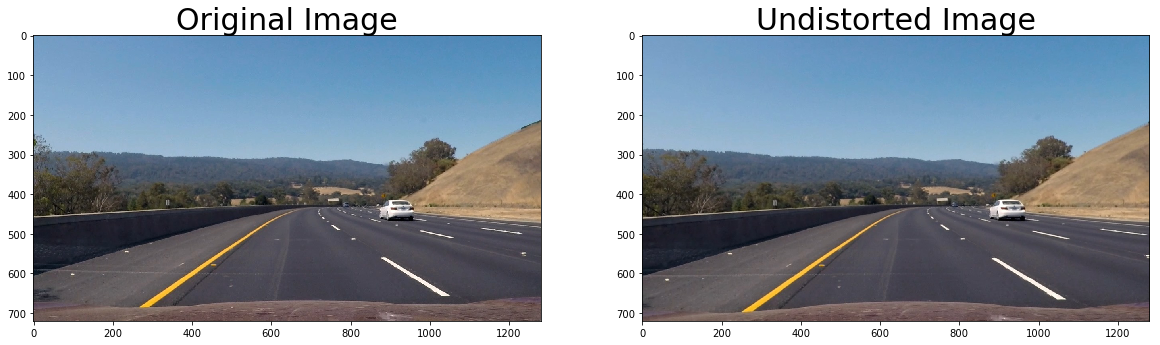

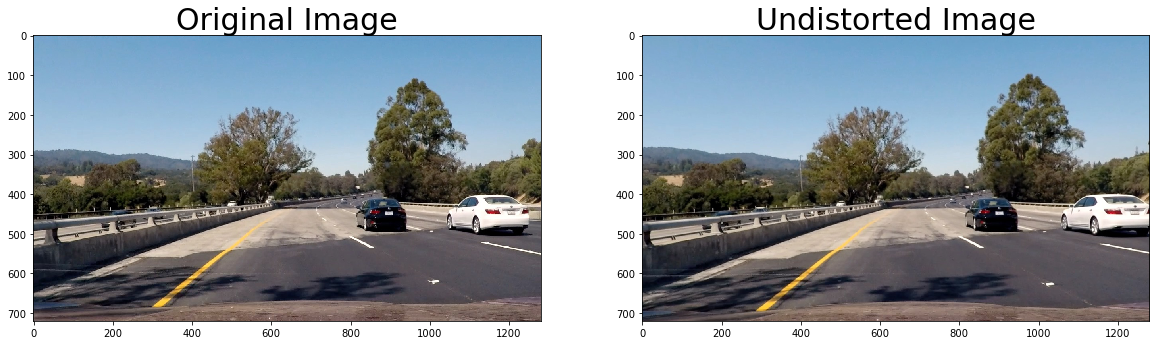

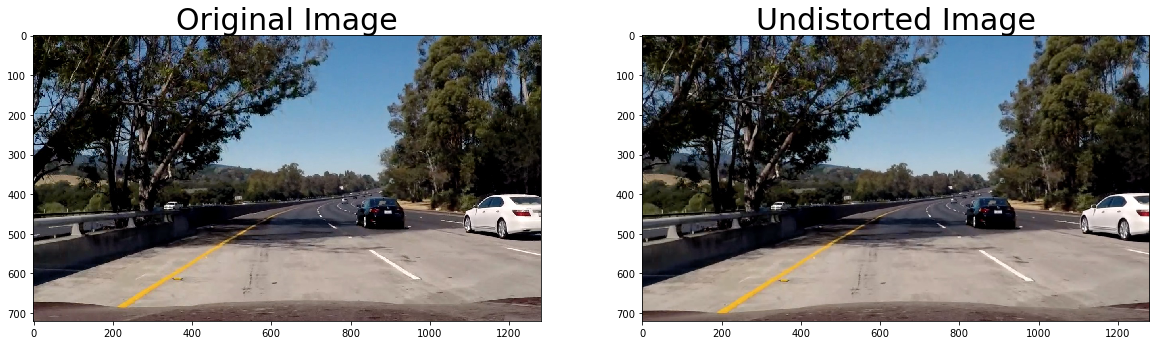

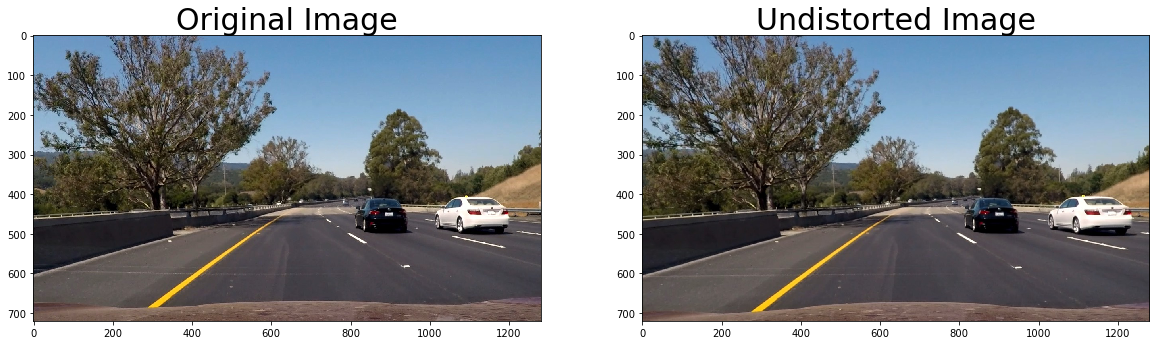

In [7]:
# Step through the list and search for chessboard corners
for idx, fname in enumerate(images_test):
    
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #img_size = (img.shape[1], img.shape[0])
    #print("img_size",img.shape[1], img.shape[0])
    
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    #dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

    # Visualize undistortion
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=30)
    ax2.imshow(dst)
    ax2.set_title('Undistorted Image', fontsize=30)
    
    images_test_undistorion.append(dst)

## Use color transforms, gradients, etc., to create a thresholded binary image.

In [8]:
# Define a function that thresholds the S-channel of HLS 
# Use exclusive lower bound (>) and inclusive upper (<=)  
def hls_select(img, thresh=(0, 255)):
    #1) Convert to HLS color space
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    H = hls[:,:,0]
    L = hls[:,:,1]
    S = hls[:,:,2]
    #2) Apply a threshold to the S channel
    binary = np.zeros_like(S)
    binary[(S > thresh[0]) & (S <= thresh[1])] = 1
    #3) Return a binary image of threshold result
    binary_output = binary
    return binary_output

def Color2Gray(img):
    # 1) Convert to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img_gray

# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
# should produce output like the example image shown above this quiz.
def abs_sobel_thresh(img, orient='x', sobel_kernel=3,abs_thresh=(0, 255)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Take the absolute value of the derivative or gradient
    if orient == 'x':
        abs_sobelx = np.absolute(sobelx)
        # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
        scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    elif orient == 'y':
        abs_sobely = np.absolute(sobely)
        # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
        scaled_sobel = np.uint8(255*abs_sobely/np.max(abs_sobely))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    #thresh_min = 20
    #thresh_max = 100
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= abs_thresh[0]) & (scaled_sobel <= abs_thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    binary_output = sxbinary # Remove this line
    return binary_output

# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Calculate the magnitude 
    abs_sobel =np.sqrt(np.add(sobelx**2, sobely**2))
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # 5) Create a binary mask where mag thresholds are met
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    binary_output = sxbinary # Remove this line
    return binary_output

# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # 1) Convert to grayscale
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    # 3) Calculate the magnitude 
    abs_sobel = np.arctan2(abs_sobely, abs_sobelx) 
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    #scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # 5) Create a binary mask where mag thresholds are met
    sxbinary = np.zeros_like(abs_sobel)
    sxbinary[(abs_sobel >= thresh[0]) & (abs_sobel <= thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    binary_output = sxbinary # Remove this line
    return binary_output

# Edit this function to create your own pipeline.
def pipeline(img, sobel_kernel=3, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # Convert to HSV color space and separate the V channel
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    l_channel = hsv[:,:,1]
    s_channel = hsv[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0, ksize=sobel_kernel) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))
    return color_binary

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

In [9]:
image = images_test_undistorion[4]
image_gray = Color2Gray(image)

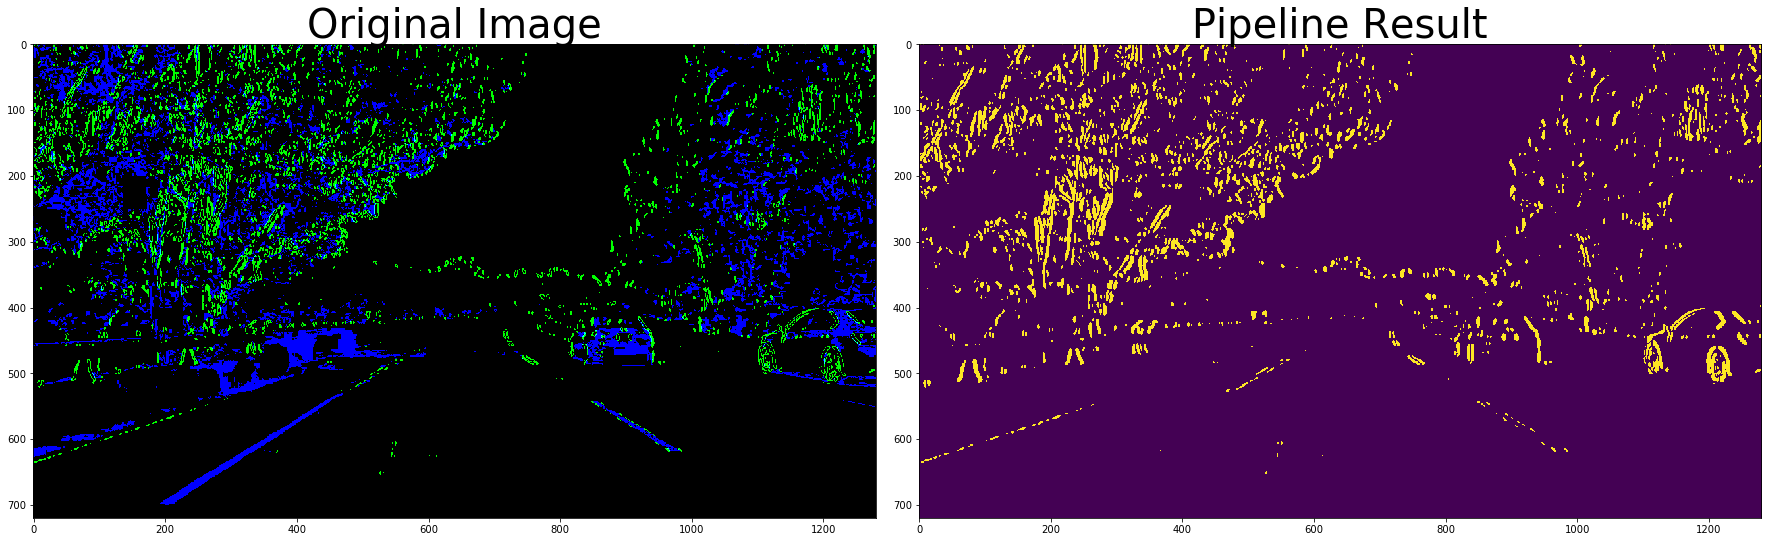

In [10]:
result = pipeline(image, sobel_kernel=9, s_thresh=(170, 255), sx_thresh=(45, 100))
grad_result = abs_sobel_thresh(image_gray, sobel_kernel=15, orient='x', abs_thresh=(50,255))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

plt.imshow(image)

ax1.imshow(result)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(grad_result)
ax2.set_title('Pipeline Result', fontsize=40)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Apply a perspective transform to rectify binary image ("birds-eye view").

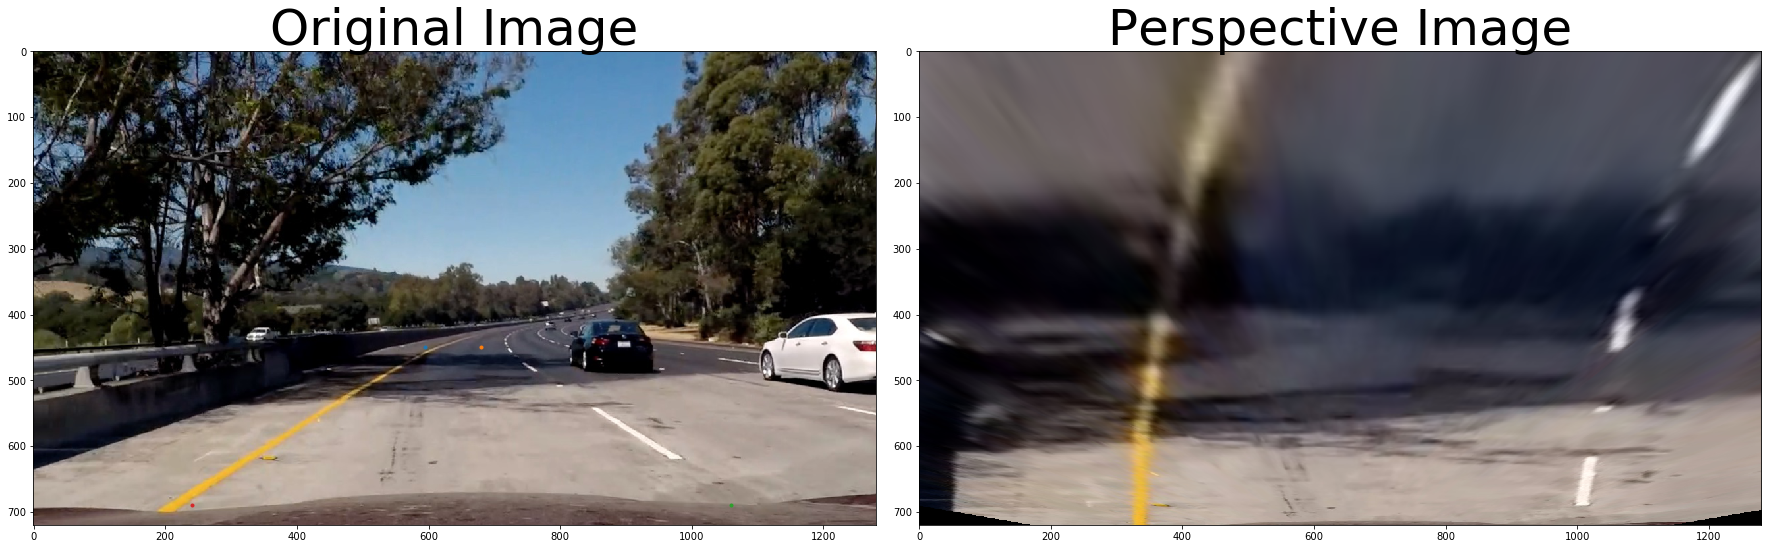

In [11]:
img_size = (image.shape[1], image.shape[0])
# For source points I'm grabbing the outer four detected corners
src = [[595, 450], [680, 450], [1060, 690],[240, 690]]
dst = [[355, 0],[975, 0], [975, 720], [355, 720]]

src = np.float32([src[0], src[1], src[2], src[3]])
# For destination points, I'm arbitrarily choosing some points to be
# a nice fit for displaying our warped result 
# again, not exact, but close enough for our purposes
dst = np.float32([dst[0], dst[1], dst[2], dst[3]])
# Given src and dst points, calculate the perspective transform matrix
M = cv2.getPerspectiveTransform(src, dst)
# Warp the image using OpenCV warpPerspective()
warped = cv2.warpPerspective(image, M, img_size, flags=cv2.INTER_LINEAR)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.plot(src[0][0],src[0][1],'.')
ax1.plot(src[1][0],src[1][1],'.')
ax1.plot(src[2][0],src[2][1],'.')
ax1.plot(src[3][0],src[3][1],'.')
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(warped, cmap='gray')
ax2.set_title('Perspective Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

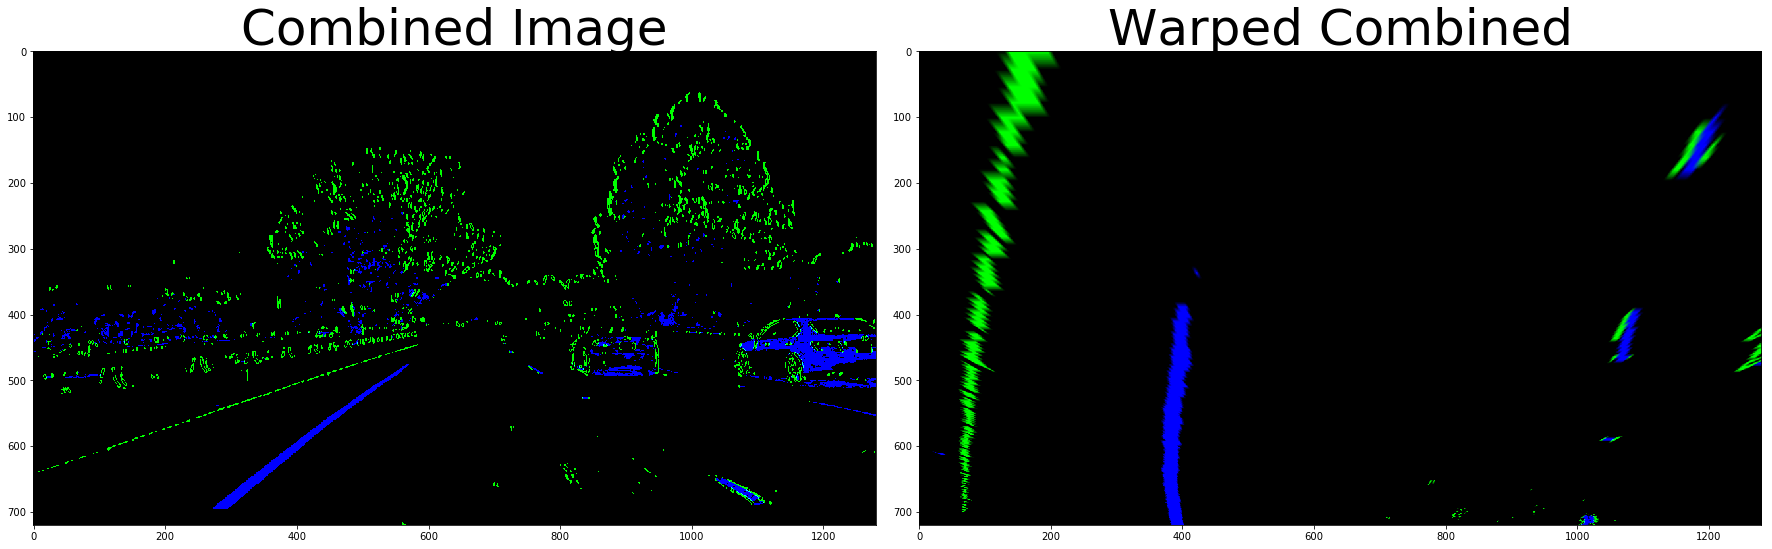

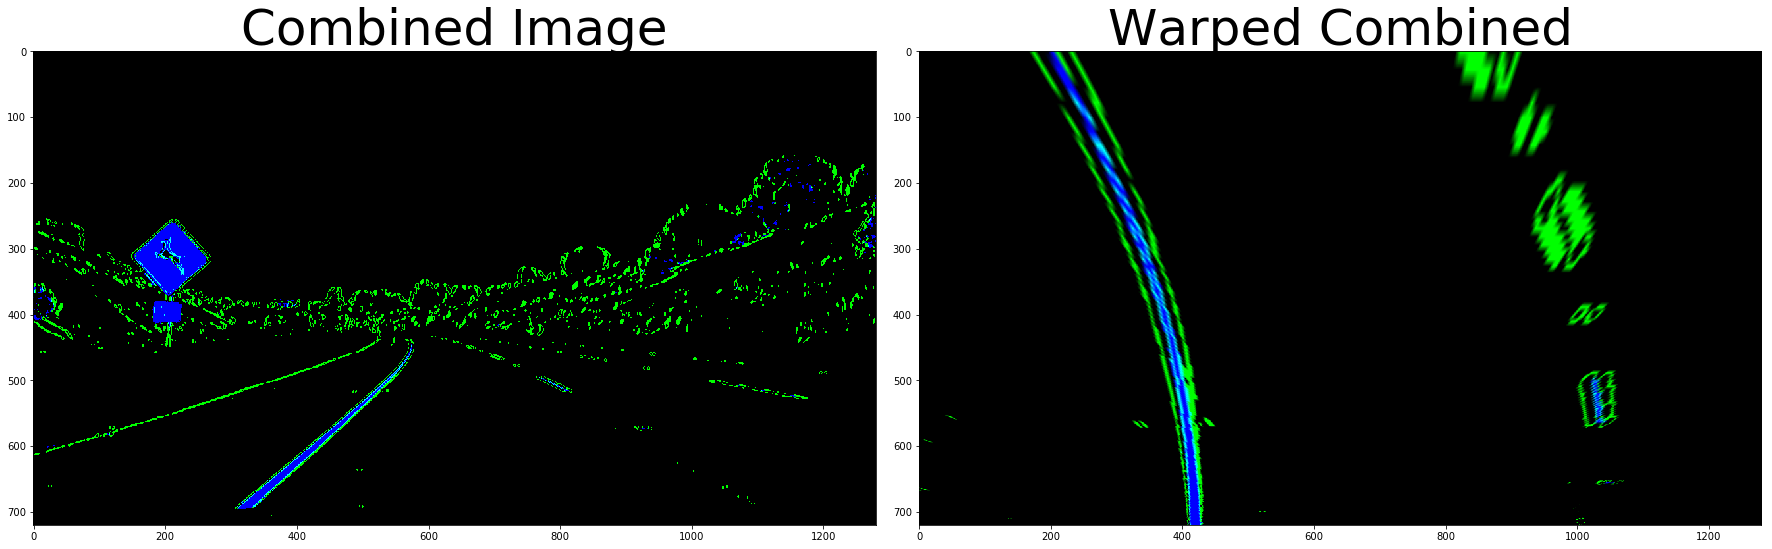

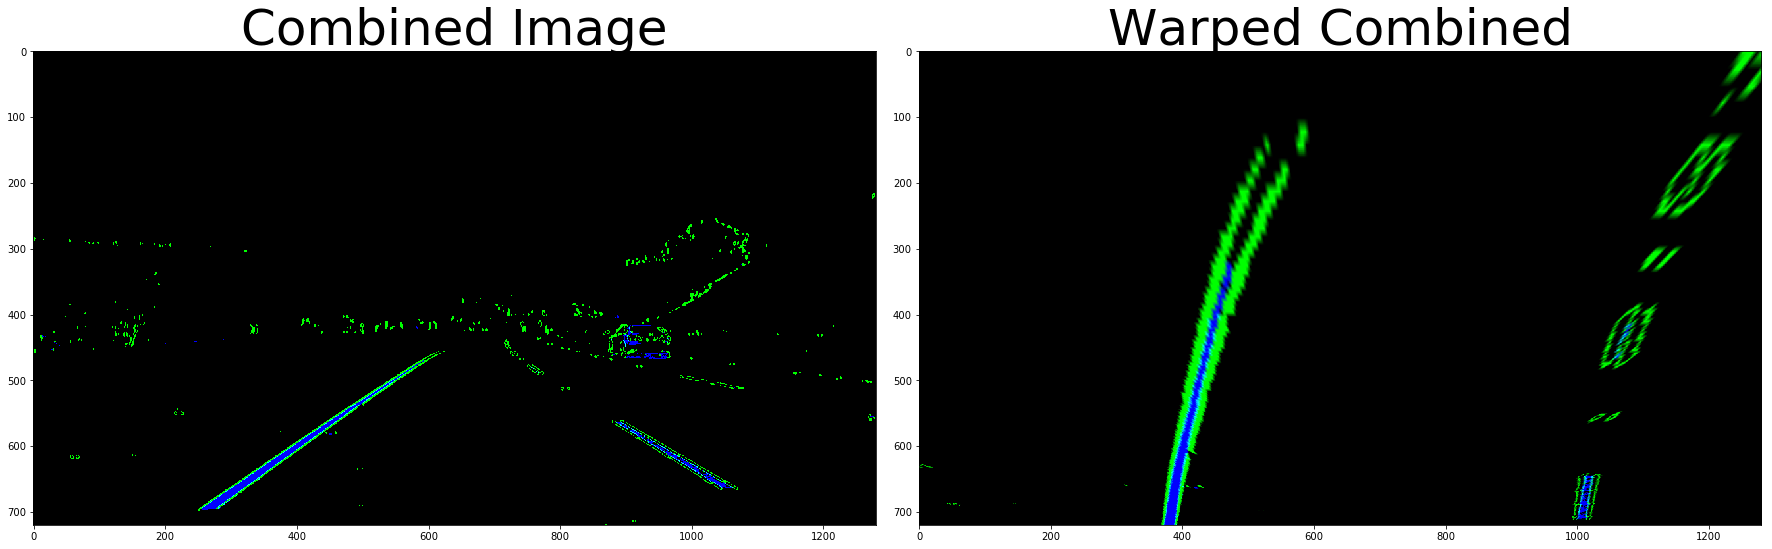

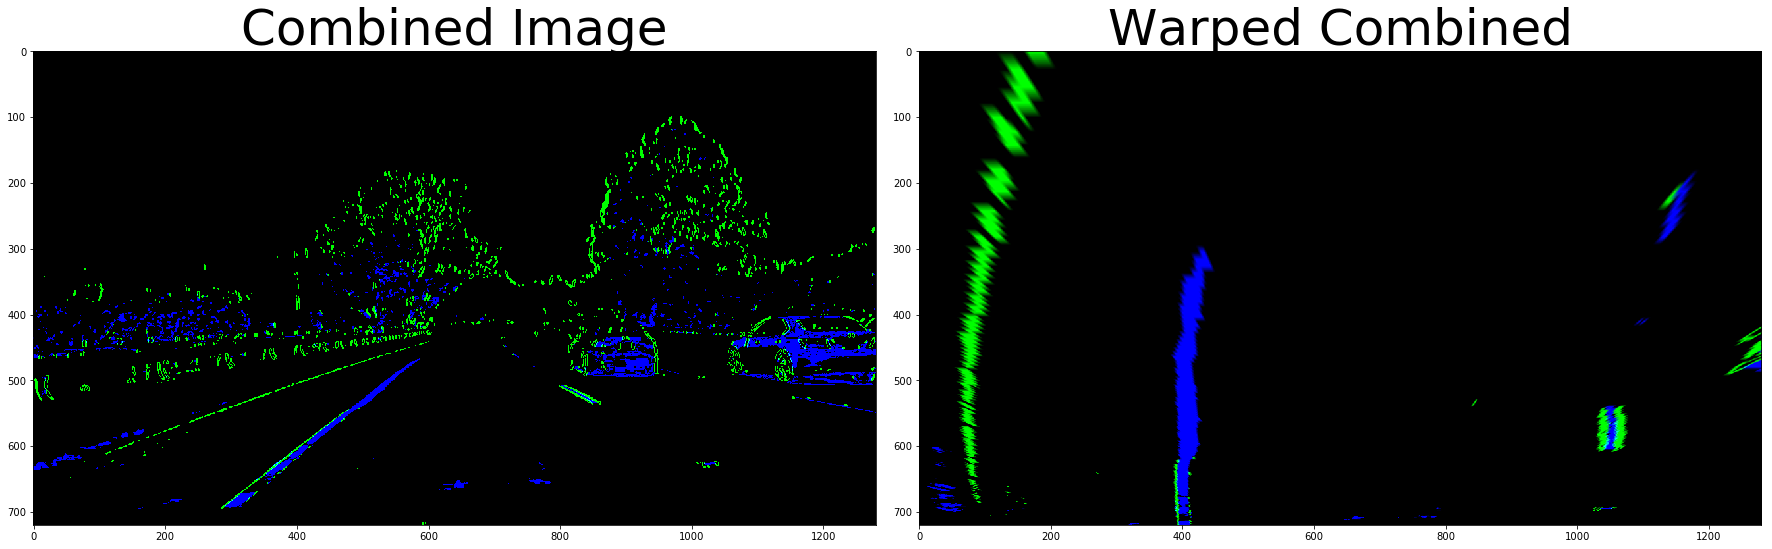

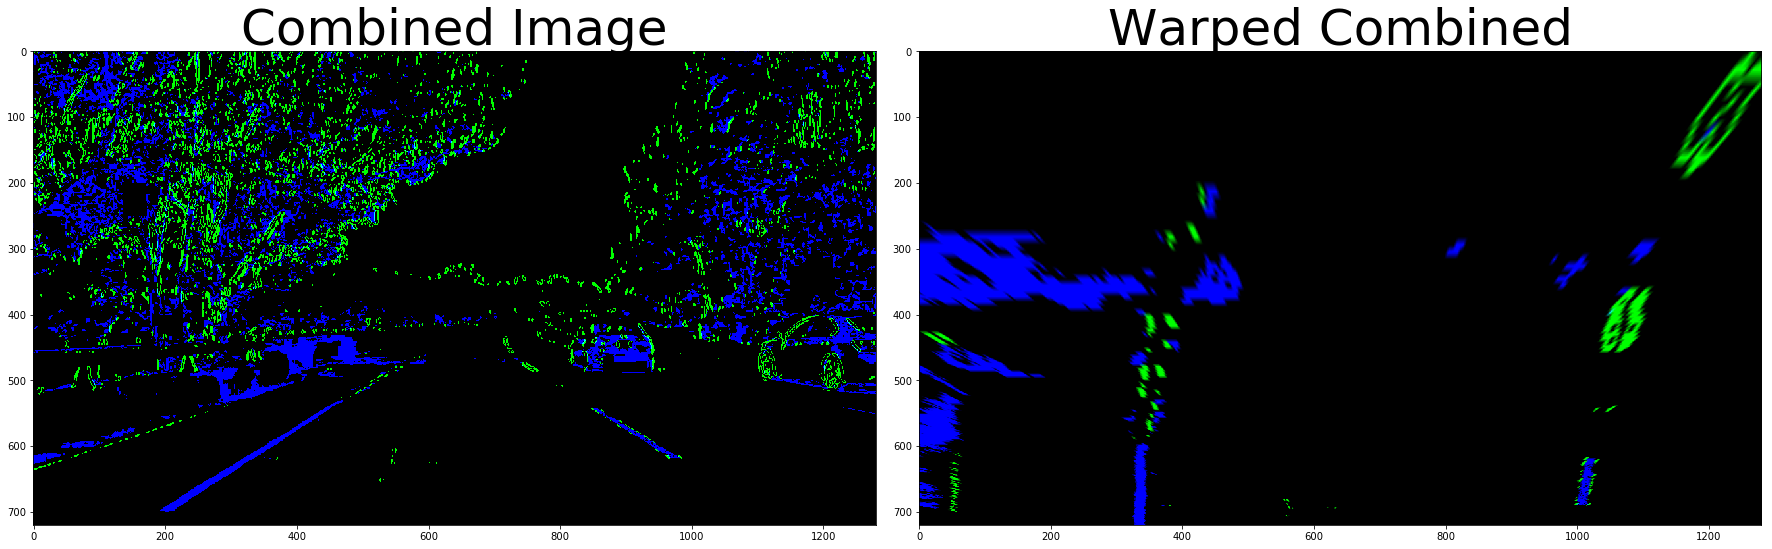

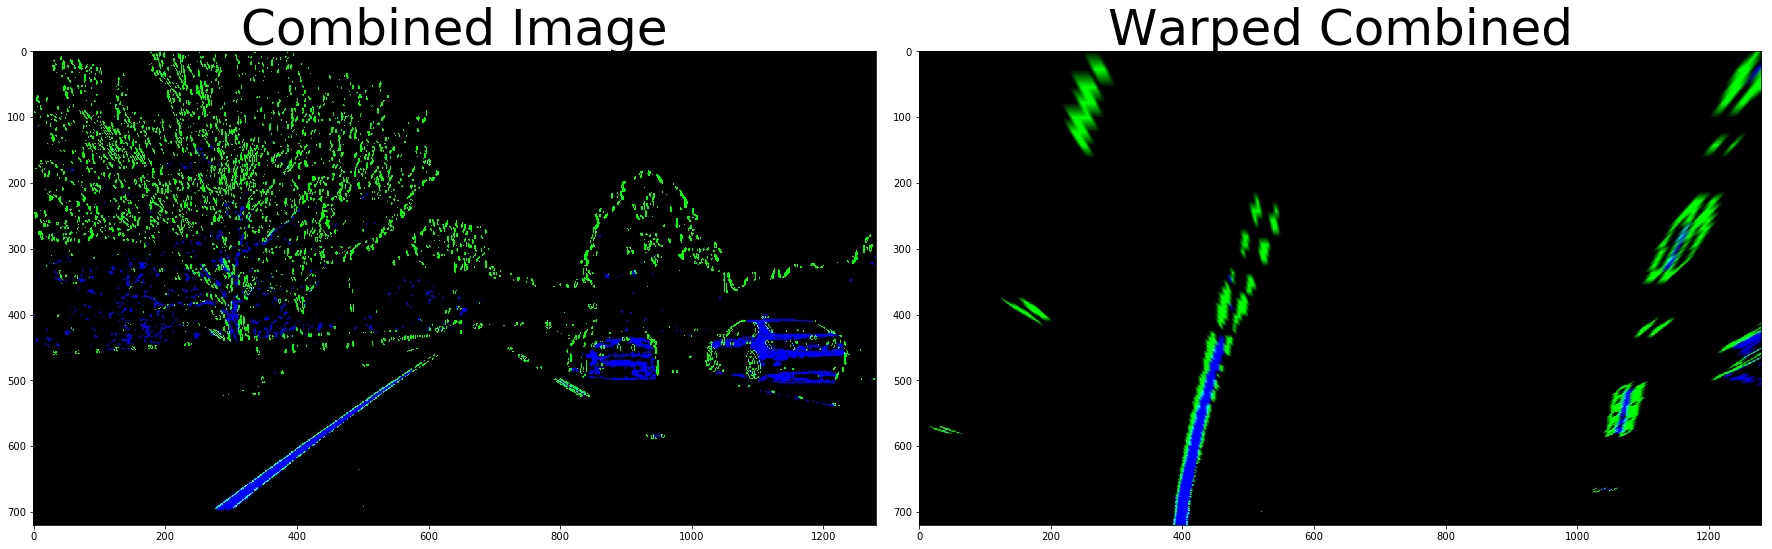

In [18]:
for image in images_test_undistorion:
    pipeline_image = pipeline(image, sobel_kernel=9, s_thresh=(170, 255), sx_thresh=(45, 100))
    
    #Region of interest
    #region_ver = np.array( [[[200,720],[550,350],[750,350],[1200,720]]], dtype=np.int32 )
    #pipeline_image_interest = region_of_interest(pipeline_image, region_ver)
    
    # Warp the image using OpenCV warpPerspective()
    warped = cv2.warpPerspective(pipeline_image, M, img_size, flags=cv2.INTER_LINEAR)
    
    images_test_warped.append(warped)
    
    # Plot the result
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(pipeline_image)
    ax1.set_title('Combined Image', fontsize=50)
    ax2.imshow(warped, cmap='gray')
    ax2.set_title('Warped Combined', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Detect lane pixels and fit to find the lane boundary.

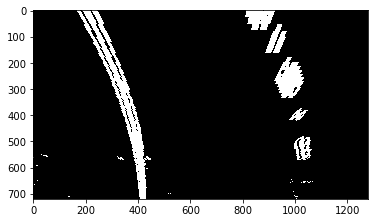

In [19]:
from skimage import color

binary_warped = images_test_warped[1]
binary_warped = color.rgb2gray(binary_warped/255.0)
binary_warped[binary_warped > 0] = 1

plt.imshow(binary_warped, cmap='gray')

/Users/Sukii/anaconda/envs/P1_python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


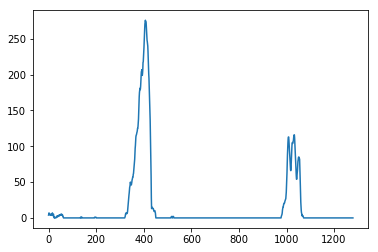

In [20]:
histogram = np.sum(binary_warped[binary_warped.shape[0]/2:,:], axis=0)
plt.plot(histogram)

/Users/Sukii/anaconda/envs/P1_python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


left_fit:  [ -3.54264663e-04   5.57259567e-01   2.03440293e+02] right_fit:  [ -4.98603690e-04   5.79727448e-01   8.61477538e+02]


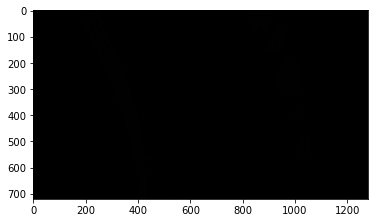

In [21]:
# Assuming you have created a warped binary image called "binary_warped"
# Take a histogram of the bottom half of the image
histogram = np.sum(binary_warped[binary_warped.shape[0]/2:,:], axis=0)
# Create an output image to draw on and  visualize the result
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
plt.imshow(out_img)
# Find the peak of the left and right halves of the histogram
# These will be the starting point for the left and right lines
midpoint = np.int(histogram.shape[0]/2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

#print("Leftx_base: ", leftx_base, "Rightx_base: ", rightx_base)

# Choose the number of sliding windows
nwindows = 9
# Set height of windows
window_height = np.int(binary_warped.shape[0]/nwindows)
# Identify the x and y positions of all nonzero pixels in the image
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
# Current positions to be updated for each window
leftx_current = leftx_base
rightx_current = rightx_base
# Set the width of the windows +/- margin
margin = 100
# Set minimum number of pixels found to recenter window
minpix = 50
# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

# Step through the windows one by one
for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
    win_y_low = binary_warped.shape[0] - (window+1)*window_height
    win_y_high = binary_warped.shape[0] - window*window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    # Draw the windows on the visualization image
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
    # Identify the nonzero pixels in x and y within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
    # Append these indices to the lists
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    # If you found > minpix pixels, recenter next window on their mean position
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
    #print("leftx_current: ", leftx_current, "rightx_current: ", rightx_current)
 
#Concatenate the arrays of indices
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

print("left_fit: ", left_fit, "right_fit: ", right_fit)


(720, 0)

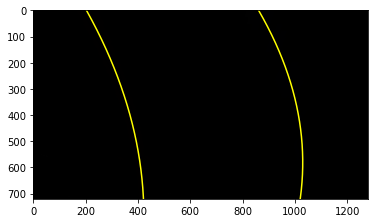

In [32]:
# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

(720, 0)

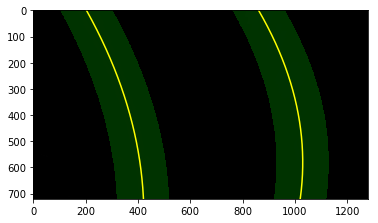

In [33]:
#Create an image to draw on and an image to show the selection window
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
window_img = np.zeros_like(out_img)
# Color in left and right line pixels
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.imshow(result)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

## Determine the curvature of the lane and vehicle position with respect to center

In [34]:
y_eval = np.max(ploty)

# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# Fit new polynomials to x,y in world space
#left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
#right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit[0]*y_eval*ym_per_pix + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval*ym_per_pix + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')
# Example values: 632.1 m    626.2 m

2061.47377706 m 1490.39067158 m


## Warp the detected lane boundaries back onto the original image.

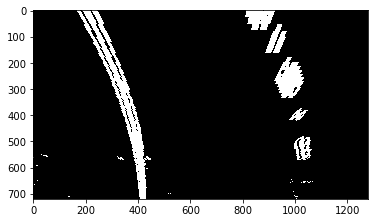

In [35]:
from skimage import color

binary_warped = out_img
binary_warped = color.rgb2gray(binary_warped/255.0)
binary_warped[binary_warped > 0] = 1

plt.imshow(binary_warped, cmap='gray')



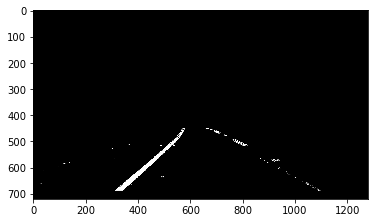

In [36]:
# Given src and dst points, calculate the perspective transform matrix
M_unwarped = cv2.getPerspectiveTransform(dst, src)
# Warp the image using OpenCV warpPerspective()
unwarped = cv2.warpPerspective(binary_warped, M_unwarped, img_size, flags=cv2.INTER_LINEAR)

plt.imshow(unwarped, cmap='gray')
    

In [37]:
# Create an image to draw the lines on
warp_zero = np.zeros_like(warped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
# Combine the result with the original image
result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
plt.imshow(result)

error: /Users/jenkins/miniconda/1/x64/conda-bld/conda_1486587097465/work/opencv-3.1.0/modules/core/src/matrix.cpp:1052: error: (-215) cn <= 4 in function scalarToRawData


## Ideas for Lane Detection Pipeline

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images
`cv2.cvtColor()` to grayscale or change color
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

## Helper Functions

Below are some helper functions to help get you started. They should look familiar from the lesson!

In [81]:
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

## Test Images

Build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

In [82]:
import os
test_array = []
test_array = os.listdir("test_images/")
os.listdir("test_images/")

['solidWhiteCurve.jpg',
 'solidWhiteRight.jpg',
 'solidYellowCurve.jpg',
 'solidYellowCurve2.jpg',
 'solidYellowLeft.jpg',
 'whiteCarLaneSwitch.jpg']

## Build a Lane Finding Pipeline



Build the pipeline and run your solution on all test_images. Make copies into the test_images directory, and you can use the images in your writeup report.

Try tuning the various parameters, especially the low and high Canny thresholds as well as the Hough lines parameters.

In [83]:
# TODO: Build your pipeline that will draw lane lines on the test_images
# then save them to the test_images directory.

def Landline_image_raw(img):
        color_select= np.copy(img)
        
        '''
        # Define color selection criteria
        ###### MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
        red_threshold = 150
        green_threshold = 150
        blue_threshold = 150
        ######

        rgb_threshold = [red_threshold, green_threshold, blue_threshold]

        # Do a boolean or with the "|" character to identify
        # pixels below the thresholds
        thresholds = (image[:,:,0] < rgb_threshold[0]) \
                    | (image[:,:,1] < rgb_threshold[1]) \
                    | (image[:,:,2] < rgb_threshold[2])
        color_select[thresholds] = [0,0,0]
        '''
        
        gray_image = grayscale(color_select)

        # Define a kernel size for Gaussian smoothing / blurring
        kernel_size = 5 # Must be an odd number (3, 5, 7...)
        gaussian_image = gaussian_blur(gray_image, kernel_size)
        
        #Canny to Dectect Lane Lines
        # Define our parameters for Canny and run it
        low_threshold = 50
        high_threshold = 150

        canny_image = canny(gaussian_image, low_threshold, high_threshold)

        #Region of interest
        region_ver = np.array( [[[0,539],[460,330],[510,330],[959,539]]], dtype=np.int32 )

        image_interest = region_of_interest(canny_image, region_ver)

        # Define the Hough transform parameters
        # Make a blank the same size as our image to draw on
        rho = 2 # distance resolution in pixels of the Hough grid
        theta = np.pi/180 # angular resolution in radians of the Hough grid
        threshold = 20     # minimum number of votes (intersections in Hough grid cell)
        min_line_len = 30 #minimum number of pixels making up a line
        max_line_gap = 20    # maximum gap in pixels between connectable line segments
        
        line_image = hough_lines(image_interest, rho, theta, threshold, min_line_len, max_line_gap)
        lane_image = weighted_img(line_image, img, α=0.8, β=1., λ=0.)
        return lane_image

In [84]:
# TODO: Build your pipeline that will draw lane lines on the test_images
# then save them to the test_images directory.

def Landline_image(img):
        color_select= np.copy(img)
        '''
        # Define color selection criteria
        ###### MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
        red_threshold = 150
        green_threshold = 150
        blue_threshold = 150
        ######

        rgb_threshold = [red_threshold, green_threshold, blue_threshold]

        # Do a boolean or with the "|" character to identify
        # pixels below the thresholds
        thresholds = (image[:,:,0] < rgb_threshold[0]) \
                    | (image[:,:,1] < rgb_threshold[1]) \
                    | (image[:,:,2] < rgb_threshold[2])
        color_select[thresholds] = [0,0,0]
        '''
        gray_image = grayscale(color_select)

        # Define a kernel size for Gaussian smoothing / blurring
        kernel_size = 5 # Must be an odd number (3, 5, 7...)
        gaussian_image = gaussian_blur(gray_image, kernel_size)

        #Canny to Dectect Lane Lines
        # Define our parameters for Canny and run it
        low_threshold = 50
        high_threshold = 150

        canny_image = canny(gaussian_image, low_threshold, high_threshold)

        #Region of interest
        region_ver = np.array( [[[0,539],[460,330],[510,330],[959,539]]], dtype=np.int32 )

        image_interest = region_of_interest(canny_image, region_ver)

        # Define the Hough transform parameters
        # Make a blank the same size as our image to draw on
        rho = 2 # distance resolution in pixels of the Hough grid
        theta = np.pi/180 # angular resolution in radians of the Hough grid
        threshold = 20     # minimum number of votes (intersections in Hough grid cell)
        min_line_len = 20 #minimum number of pixels making up a line
        max_line_gap = 20    # maximum gap in pixels between connectable line segments
        #line_image = np.copy(image)*0 # creating a blank to draw lines on

        
        lines = cv2.HoughLinesP(image_interest, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
        #Calculation for two land line equation y = Ax +C
        A_sum_1 = 0
        A_average_1 = 0 
        C_sum_1 = 0
        C_average_1 = 0 
        num_line_1 = 0
        
        A_sum_2 = 0
        A_average_2 = 0
        C_sum_2 = 0
        c_average_2 = 0
        num_line_2 = 0
        #line 1
        x1_1 = 0
        x2_1 = 0
        y1_1 = 0
        y2_1 = 0
        A_1 = 0
        #line 2
        x1_2 = 0
        x2_2 = 0
        y1_2 = 0
        y2_2 = 0
        A_2 = 0
        for line in lines:
            for x1,y1,x2,y2 in line:
                A_temp = (y2-y1)/(x2-x1)
                C_temp = y2-A_temp*x2
                
                if A_1 == 0 and A_temp<0:
                    A_1 = A_temp
                if A_2 == 0 and A_temp>0:
                    A_2 = A_temp
                    
                if A_temp<0 and abs(A_temp-A_1)<0.2:
                    if x1 < x1_1 or x1_1==0:
                        x1_1 = x1
                    if y1 > y1_1:
                        y1_1 = y1
                    if x2 > x2_1:
                        x2_1 = x2
                    if y2 < y2_1 or y2_1==0:
                        y2_1 = y2
                    A_1 = A_temp
                    
                    A_sum_1 = A_sum_1 + A_temp
                    C_sum_1 = C_sum_1 + C_temp
                    num_line_1 = num_line_1 + 1
                    
                if A_temp>0 and abs(A_temp-A_2)<0.2:
                    if x1 < x1_2 or x1_2==0:
                        x1_2 = x1
                    if y1 < y1_2 or y1_2==0:
                        y1_2 = y1
                    if x2 > x2_2:
                        x2_2 = x2
                    if y2 > y2_2:
                        y2_2 = y2
                    A_2 = A_temp
                    
                    A_sum_2 = A_sum_2 + A_temp
                    C_sum_2 = C_sum_2 + C_temp
                    num_line_2 = num_line_2 + 1  
                
        A_average_1 = A_sum_1 / num_line_1
        C_average_1 = C_sum_1 / num_line_1

        A_average_2 = A_sum_2 / num_line_2
        C_average_2 = C_sum_2 / num_line_2

        #Let two line point to the bottom of pic, which is ys = 539, xs = (ye - C)/A
        xs_1 = int((539 - C_average_1)/A_average_1)
        ys_1 = 539
        xs_2 = int((539 - C_average_2)/A_average_2)
        ys_2 = 539
        line_new = [[[xs_1, ys_1, x2_1, y2_1]],[[x1_2, y1_2, xs_2, ys_2]]] 
        line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
        draw_lines(line_img, line_new, color=[255, 0, 0], thickness=10)
        lane_image = weighted_img(line_img, img, α=0.8, β=1., λ=0.)
        return lane_image

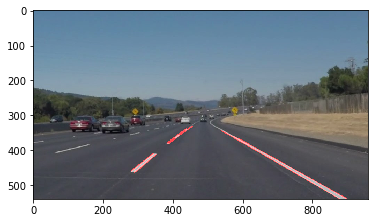

In [85]:
#Print out all the images in test_images folder
images = mpimg.imread('test_images/' + test_array[0])
plt.imshow(Landline_image_raw(images))

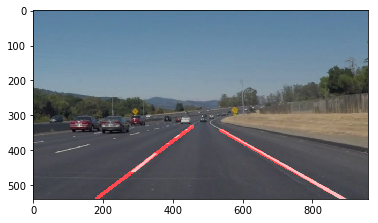

In [86]:
plt.imshow(Landline_image(images))

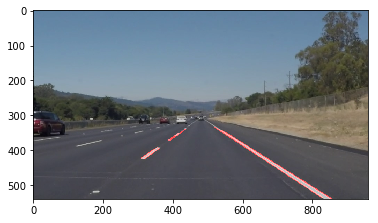

In [87]:
#Print out all the images in test_images folder
images = mpimg.imread('test_images/' + test_array[1])
plt.imshow(Landline_image_raw(images))

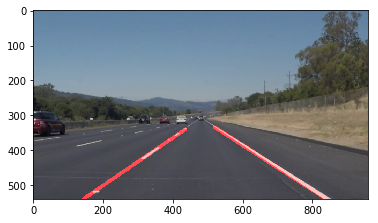

In [88]:
plt.imshow(Landline_image(images))

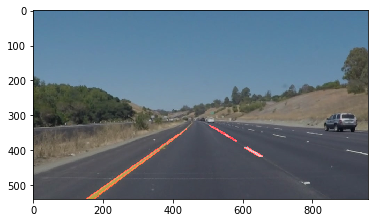

In [89]:
#Print out all the images in test_images folder
images = mpimg.imread('test_images/' + test_array[2])
plt.imshow(Landline_image_raw(images))

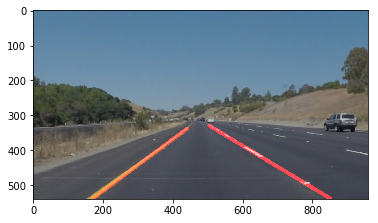

In [90]:
plt.imshow(Landline_image(images))

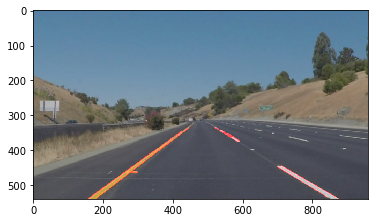

In [91]:
#Print out all the images in test_images folder
images = mpimg.imread('test_images/' + test_array[3])
plt.imshow(Landline_image_raw(images))

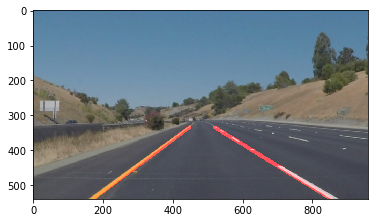

In [92]:
plt.imshow(Landline_image(images))

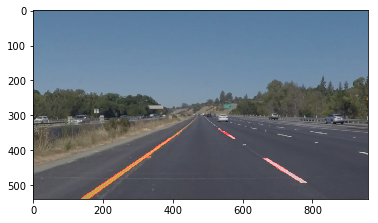

In [93]:
#Print out all the images in test_images folder
images = mpimg.imread('test_images/' + test_array[4])
plt.imshow(Landline_image_raw(images))

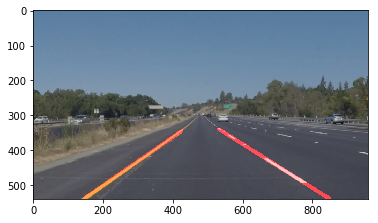

In [94]:
plt.imshow(Landline_image(images))

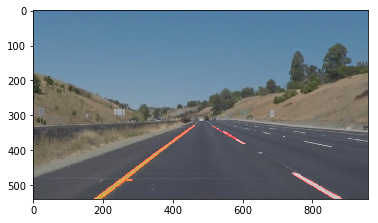

In [95]:
#Print out all the images in test_images folder
images = mpimg.imread('test_images/' + test_array[5])
plt.imshow(Landline_image_raw(images))

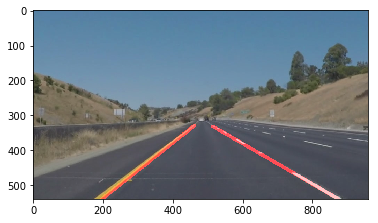

In [96]:
plt.imshow(Landline_image(images))

## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

**Note: if you get an `import error` when you run the next cell, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt. Also, check out [this forum post](https://carnd-forums.udacity.com/questions/22677062/answers/22677109) for more troubleshooting tips.**

**If you get an error that looks like this:**
```
NeedDownloadError: Need ffmpeg exe. 
You can download it by calling: 
imageio.plugins.ffmpeg.download()
```
**Follow the instructions in the error message and check out [this forum post](https://carnd-forums.udacity.com/display/CAR/questions/26218840/import-videofileclip-error) for more troubleshooting tips across operating systems.**

In [97]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML


In [98]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)

    return Landline_image(image)

Let's try the one with the solid white lane on the right first ...

In [99]:
white_output = 'white.mp4'
clip1 = VideoFileClip("solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video white.mp4
[MoviePy] Writing video white.mp4


100%|███████████████████████████████████████▊| 221/222 [00:06<00:00, 32.75it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: white.mp4 

Wall time: 8.05 s


Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [100]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

## Improve the draw_lines() function

**At this point, if you were successful with making the pipeline and tuning parameters, you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform. As mentioned previously, try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines. You can see an example of the result you're going for in the video "P1_example.mp4".**

**Go back and modify your draw_lines function accordingly and try re-running your pipeline. The new output should draw a single, solid line over the left lane line and a single, solid line over the right lane line. The lines should start from the bottom of the image and extend out to the top of the region of interest.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [72]:
yellow_output = 'yellow.mp4'
clip2 = VideoFileClip('solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

[MoviePy] >>>> Building video yellow.mp4
[MoviePy] Writing video yellow.mp4


100%|███████████████████████████████████████▉| 681/682 [00:24<00:00, 27.56it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: yellow.mp4 

Wall time: 26.1 s


In [73]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Writeup and Submission

If you're satisfied with your video outputs, it's time to make the report writeup in a pdf or markdown file. Once you have this Ipython notebook ready along with the writeup, it's time to submit for review! Here is a [link](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) to the writeup template file.


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [74]:
challenge_output = 'extra.mp4'
clip2 = VideoFileClip('challenge.mp4')
challenge_clip = clip2.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

[MoviePy] >>>> Building video extra.mp4
[MoviePy] Writing video extra.mp4


100%|████████████████████████████████████████| 251/251 [00:23<00:00, 10.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: extra.mp4 

Wall time: 26.9 s


In [75]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))